# Data Mining Project

## Knowledge Extraction Pipeline

This notebooks defines a series os steps that end up in the production of the desired prediction, including Data Preparation, Modeling and Evaluation, according to CRISP-DM guidelines.
For information regarding Data Understanding, please refer to [Data Understanding](data_understanding.ipynb).

#### Dependencies

The code block below defines the major dependencies for the project.
To make sure you are set up, please run the following command in order to update dependencies:

```bash
pip install -r requirements.txt
```

We chose to use a set of technologies that we were familiar with and should be adequate for the problem at hand.
These include **sklearn** to model the data, **matplotlib** and **seaborn** to create graphics and **pandas** to better read the data.

In [1]:
# Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os


## Data Preparation

TODO: add text about data set (summary from data exploration)

In [2]:
_dir = 'data'

df = pd.read_csv(os.path.join(_dir, 'teams.csv'))
df.head()

,year,lgID,tmID,franchID,confID,divID,rank,playoff,seeded,firstRound,...,GP,homeW,homeL,awayW,awayL,confW,confL,min,attend,arena
0,9,WNBA,ATL,ATL,EA,NaN,7,N,0,NaN,...,34,1,16,3,14,2,18,6825,141379,Philips Arena
1,10,WNBA,ATL,ATL,EA,NaN,2,Y,0,L,...,34,12,5,6,11,10,12,6950,120737,Philips Arena
2,1,WNBA,CHA,CHA,EA,NaN,8,N,0,NaN,...,32,5,11,3,13,5,16,6475,90963,Charlotte Coliseum
3,2,WNBA,CHA,CHA,EA,NaN,4,Y,0,W,...,32,11,5,7,9,15,6,6500,105525,Charlotte Coliseum
4,3,WNBA,CHA,CHA,EA,NaN,2,Y,0,L,...,32,11,5,7,9,12,9,6450,106670,Charlotte Coliseum


TODO: add text about which transformations were made

In [3]:
df['playoff'] = df['playoff'].eq('Y').mul(1)
df = df.select_dtypes(['number']) # Remove later
df.dropna(axis=1, inplace=True)
df.head()

,year,rank,playoff,seeded,o_fgm,o_fga,o_ftm,o_fta,o_3pm,o_3pa,...,lost,GP,homeW,homeL,awayW,awayL,confW,confL,min,attend
0,9,7,0,0,895,2258,542,725,202,598,...,30,34,1,16,3,14,2,18,6825,141379
1,10,2,1,0,1089,2428,569,755,114,374,...,16,34,12,5,6,11,10,12,6950,120737
2,1,8,0,0,812,1903,431,577,131,386,...,24,32,5,11,3,13,5,16,6475,90963
3,2,4,1,0,746,1780,410,528,153,428,...,14,32,11,5,7,9,15,6,6500,105525
4,3,2,1,0,770,1790,490,663,211,527,...,14,32,11,5,7,9,12,9,6450,106670


## Modeling and Evaluation

The following block defines general utility function that will serve to model the data and access results.

We chose to create the training and testing subsets in a temporal fashion.
The reason being it wouldn't make sense to scatter data from different years, since our game data is chronological.
As an example, we can train the model with the first 9 years and use the 10th and last to test the model's predictions.

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

train_df = df[df['year'] < 10]
test_df = df[df['year'] == 10]

X_train = train_df.drop('playoff', axis=1)
y_train = train_df['playoff']

X_test = test_df.drop('playoff', axis=1)
y_test = test_df['playoff']

'''Get metrics for the prediction'''
def getMetrics(model, testing_inputs, testing_classes):
    model.score(testing_inputs, testing_classes)

    y_pred = model.predict(testing_inputs)

    accuracy = accuracy_score(testing_classes, y_pred)
    precision = precision_score(testing_classes, y_pred)
    recall = recall_score(testing_classes, y_pred)
    f1 = f1_score(testing_classes, y_pred)
    return (y_pred, accuracy, precision, recall, f1)

'''Run a model and print results'''
def runModel(model):
    model.fit(X_train, y_train)
    _y_pred, accuracy, precision, recall, f1 = getMetrics(model, X_test, y_test)

    print(f"Accuracy: {round(accuracy * 100, 2)}%")
    print(f"Precision: {round(precision * 100, 2)}%")
    print(f"Recall: {round(recall * 100, 2)}%")
    print(f"F1-measure: {round(f1 * 100, 2)}%")

    cm = confusion_matrix(y_test, _y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(5, 5))
    sb.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
F1-measure: 100.0%


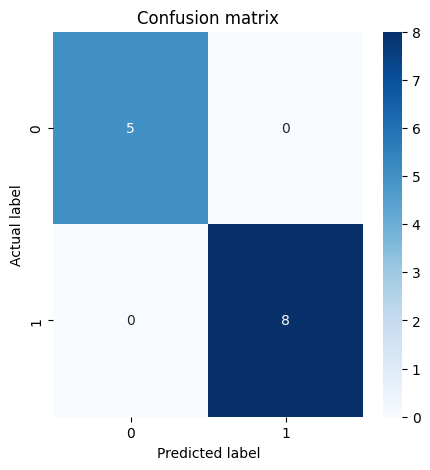

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

model = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=5, min_samples_leaf=1, min_samples_split=2)
#model = GaussianNB()
runModel(model)